In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
plt.style.use('seaborn')

C:\Users\avigy\AppData\Local\Temp\ipykernel_6588\554475134.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
kc_house = pd.read_csv("kc_house_data.csv")
kc_house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
kc_house['reno_year_no'] = kc_house['yr_renovated'] - kc_house['yr_built']

In [5]:
kc_house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,reno_year_no
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,-1955.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,40.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,NaN
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,-1965.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,-1987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,-2009.0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,-2014.0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,-2009.0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,-2004.0


In [6]:
kc_house['reno_year_no'] = kc_house['reno_year_no'].fillna(0).astype(int)
kc_house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,reno_year_no
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,-1955
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,40
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,-1965
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,-1987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,-2009
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,-2014
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,-2009
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,-2004


In [7]:
print(kc_house['reno_year_no'].max())
print(kc_house['reno_year_no'].min())

114
-2015


In [8]:
kc_house['reno_year_no'] = kc_house.groupby('yr_renovated')['reno_year_no'].transform('sum')

In [9]:
kc_house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,reno_year_no
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,-33554067.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,787.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,NaN
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,-33554067.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,-33554067.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,-33554067.0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,-33554067.0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,-33554067.0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,-33554067.0


In [10]:
kc_house[['yr_renovated','reno_year_no']] = kc_house[['yr_renovated','reno_year_no']].mask(kc_house['yr_renovated'].duplicated()).fillna('')

In [11]:
kc_house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,reno_year_no
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,-33554067.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,787.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,,98028,47.7379,-122.233,2720,8062,
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,,98136,47.5208,-122.393,1360,5000,
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,,98074,47.6168,-122.045,1800,7503,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,1530,0.0,2009,,98103,47.6993,-122.346,1530,1509,
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,2310,0.0,2014,,98146,47.5107,-122.362,1830,7200,
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,1020,0.0,2009,,98144,47.5944,-122.299,1020,2007,
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,1600,0.0,2004,,98027,47.5345,-122.069,1410,1287,


In [12]:
kc_house['reno_year_no']


0       -33554067.0
1             787.0
2                  
3                  
4                  
            ...    
21592              
21593              
21594              
21595              
21596              
Name: reno_year_no, Length: 21597, dtype: object

In [13]:
kc_house.drop_duplicates()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,reno_year_no
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,-33554067.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,787.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,,98028,47.7379,-122.233,2720,8062,
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,,98136,47.5208,-122.393,1360,5000,
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,,98074,47.6168,-122.045,1800,7503,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,1530,0.0,2009,,98103,47.6993,-122.346,1530,1509,
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,2310,0.0,2014,,98146,47.5107,-122.362,1830,7200,
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,1020,0.0,2009,,98144,47.5944,-122.299,1020,2007,
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,1600,0.0,2004,,98027,47.5345,-122.069,1410,1287,


In [14]:
f = 'price~sqft_above'

In [15]:
model = ols(formula=f, data=kc_house).fit()

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                 1.249e+04
Date:                Wed, 07 Feb 2024   Prob (F-statistic):               0.00
Time:                        20:42:12   Log-Likelihood:            -3.0246e+05
No. Observations:               21597   AIC:                         6.049e+05
Df Residuals:                   21595   BIC:                         6.049e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.976e+04   4737.581     12.613      0.000    5.05e+04     6.9e+04
sqft_above   268.6684      2.404    111.767      0.000     263.957     273.380
==============================================================================
Omnibus:                    16492.245   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           728366.432
Skew:                           3.265   Prob(JB):                         0.00
Kurtosis:                      30.691   Cond. No.                     4.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

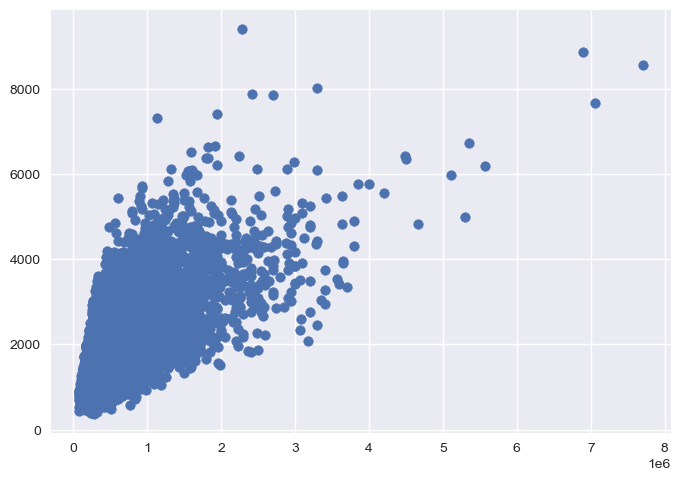

In [17]:
plt.scatter(kc_house.price, kc_house.sqft_above)
plt.show()

In [18]:
kc_house['reno_year_no']

0       -33554067.0
1             787.0
2                  
3                  
4                  
            ...    
21592              
21593              
21594              
21595              
21596              
Name: reno_year_no, Length: 21597, dtype: object

# indentifying catagorical veriables

In [19]:
kc_house[['reno_year_no', 'bedrooms', 'bathrooms']].nunique()

reno_year_no    68
bedrooms        12
bathrooms       29
dtype: int64

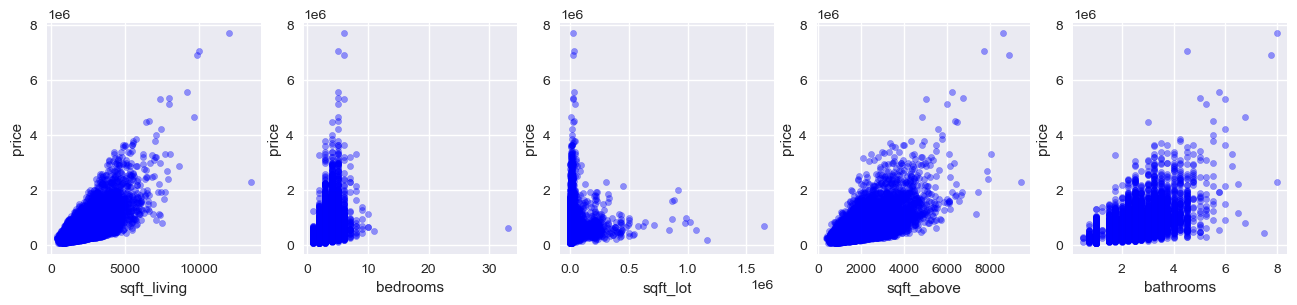

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,3))

for xcol, ax in zip(['sqft_living', 'bedrooms', 'sqft_lot','sqft_above','bathrooms'], axes):
    kc_house.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

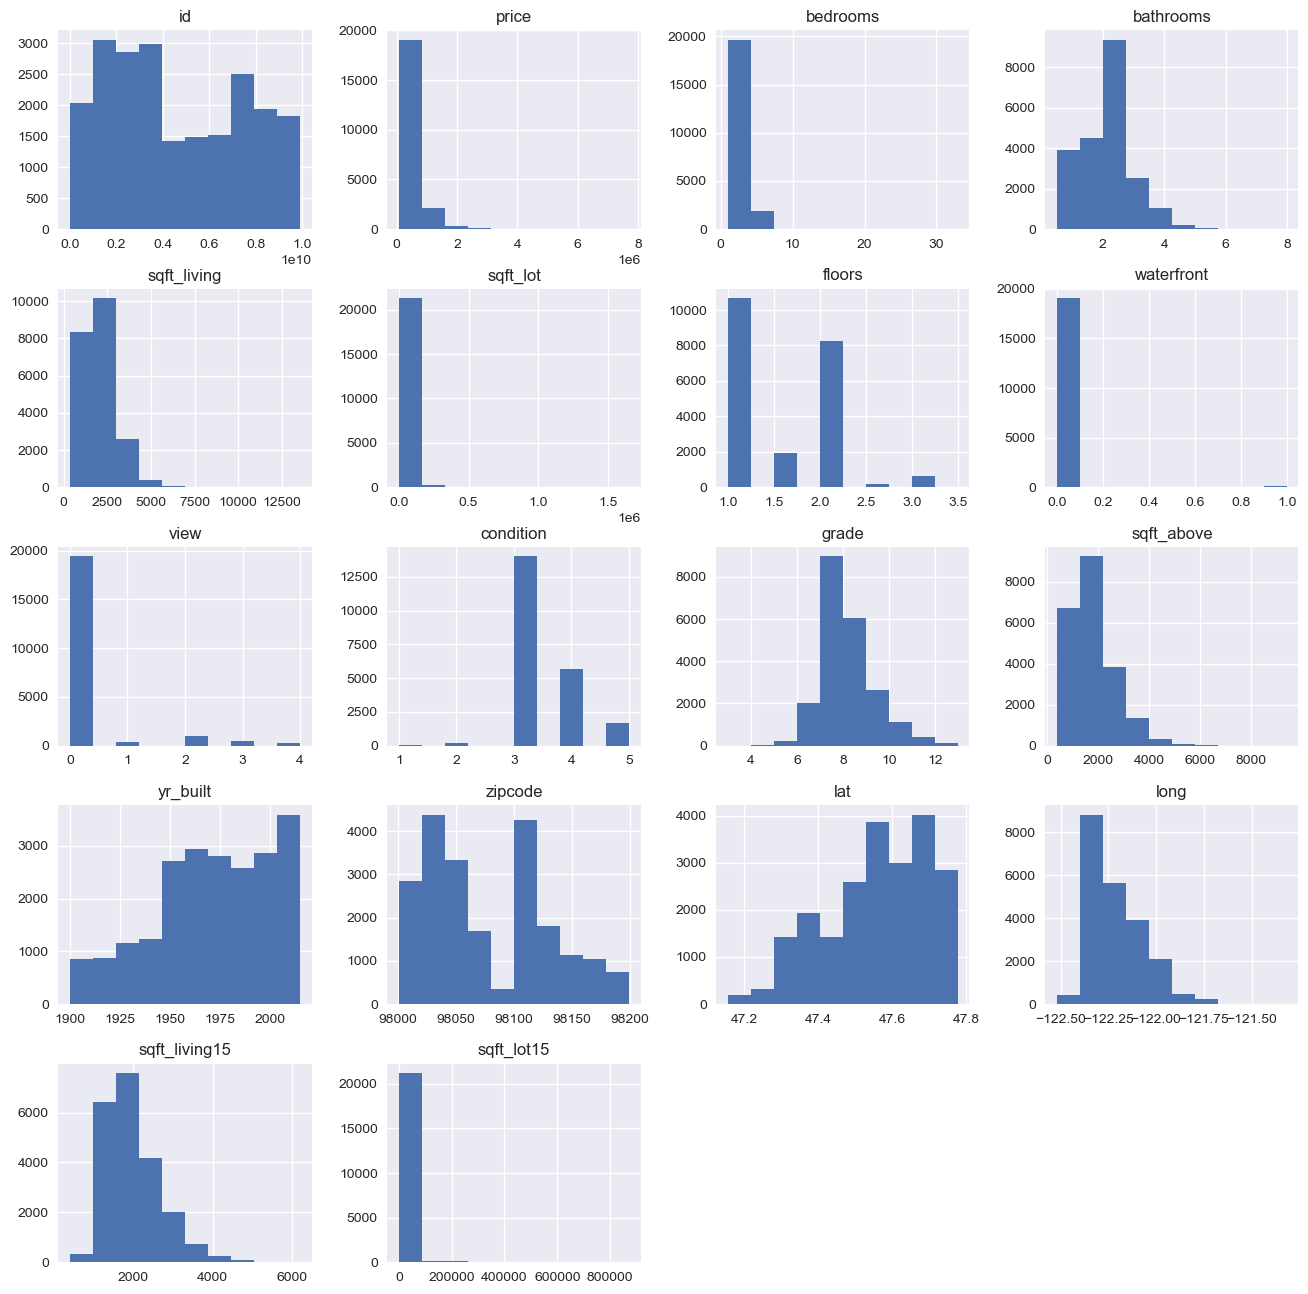

In [21]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (16,16))
ax = fig.gca()
kc_house.hist(ax = ax);

In [22]:
ro_dummies = pd.get_dummies(kc_house['reno_year_no'], prefix='ro', drop_first=True)
bdr_dummies = pd.get_dummies(kc_house['bedrooms'], prefix='bdr', drop_first=True)
bar_dummies = pd.get_dummies(kc_house['bathrooms'], prefix='bar', drop_first=True)

In [23]:
kc_house1 = kc_house.drop(['bedrooms','bathrooms', 'reno_year_no'], axis=1)

In [24]:
kc_house1 = pd.concat([kc_house, bdr_dummies, bar_dummies ], axis=1)
kc_house1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,bar_5.25,bar_5.5,bar_5.75,bar_6.0,bar_6.25,bar_6.5,bar_6.75,bar_7.5,bar_7.75,bar_8.0
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
kc_house


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,reno_year_no
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,-33554067.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,787.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,,98028,47.7379,-122.233,2720,8062,
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,,98136,47.5208,-122.393,1360,5000,
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,,98074,47.6168,-122.045,1800,7503,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,1530,0.0,2009,,98103,47.6993,-122.346,1530,1509,
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,2310,0.0,2014,,98146,47.5107,-122.362,1830,7200,
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,1020,0.0,2009,,98144,47.5944,-122.299,1020,2007,
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,1600,0.0,2004,,98027,47.5345,-122.069,1410,1287,


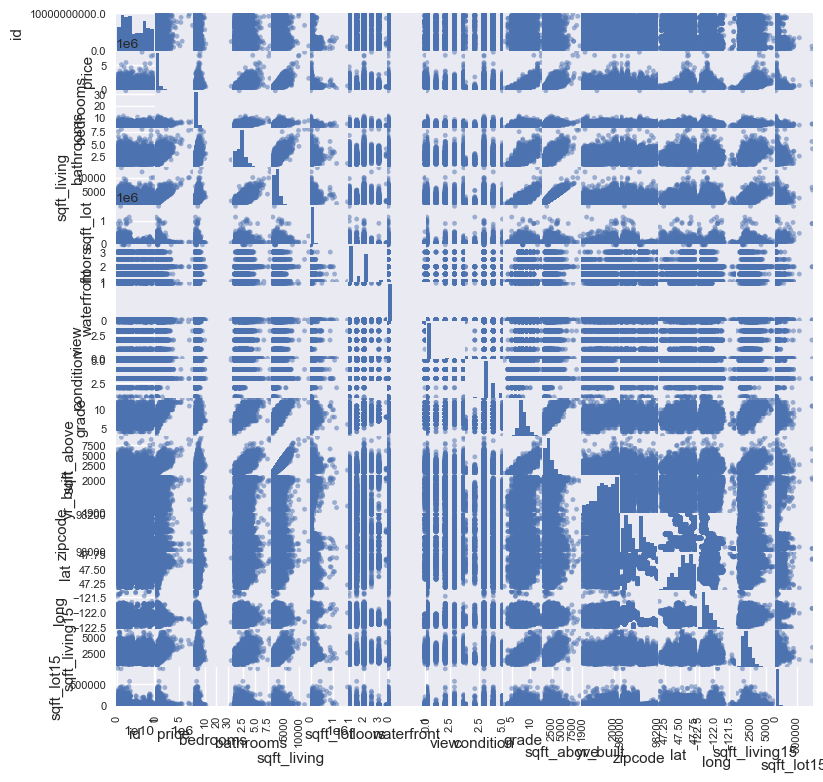

In [26]:
 pd.plotting.scatter_matrix(kc_house,figsize  = [9, 9]);
plt.show()


In [27]:
kc_house.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [28]:
abs(kc_house.corr()) > 0.75

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,True,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [29]:
df = kc_house.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['pairs'] = list(zip(df.level_0, df.level_1))

df.set_index(['pairs'], inplace = True)

df.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df.columns = ['cc']

df.drop_duplicates(inplace=True)

df[(df.cc>.75) & (df.cc<1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.876448
"(grade, sqft_living)",0.762779
"(sqft_living, sqft_living15)",0.756402
"(sqft_above, grade)",0.756073
"(bathrooms, sqft_living)",0.755758


In [30]:
kc_house.drop(columns=['sqft_living','sqft_above'])

,id,date,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,reno_year_no
0,7129300520,10/13/2014,221900.0,3,1.00,5650,1.0,NaN,0.0,3,7,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,-33554067.0
1,6414100192,12/9/2014,538000.0,3,2.25,7242,2.0,0.0,0.0,3,7,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,787.0
2,5631500400,2/25/2015,180000.0,2,1.00,10000,1.0,0.0,0.0,3,6,0.0,1933,,98028,47.7379,-122.233,2720,8062,
3,2487200875,12/9/2014,604000.0,4,3.00,5000,1.0,0.0,0.0,5,7,910.0,1965,,98136,47.5208,-122.393,1360,5000,
4,1954400510,2/18/2015,510000.0,3,2.00,8080,1.0,0.0,0.0,3,8,0.0,1987,,98074,47.6168,-122.045,1800,7503,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1131,3.0,0.0,0.0,3,8,0.0,2009,,98103,47.6993,-122.346,1530,1509,
21593,6600060120,2/23/2015,400000.0,4,2.50,5813,2.0,0.0,0.0,3,8,0.0,2014,,98146,47.5107,-122.362,1830,7200,
21594,1523300141,6/23/2014,402101.0,2,0.75,1350,2.0,0.0,0.0,3,7,0.0,2009,,98144,47.5944,-122.299,1020,2007,
21595,291310100,1/16/2015,400000.0,3,2.50,2388,2.0,NaN,0.0,3,8,0.0,2004,,98027,47.5345,-122.069,1410,1287,


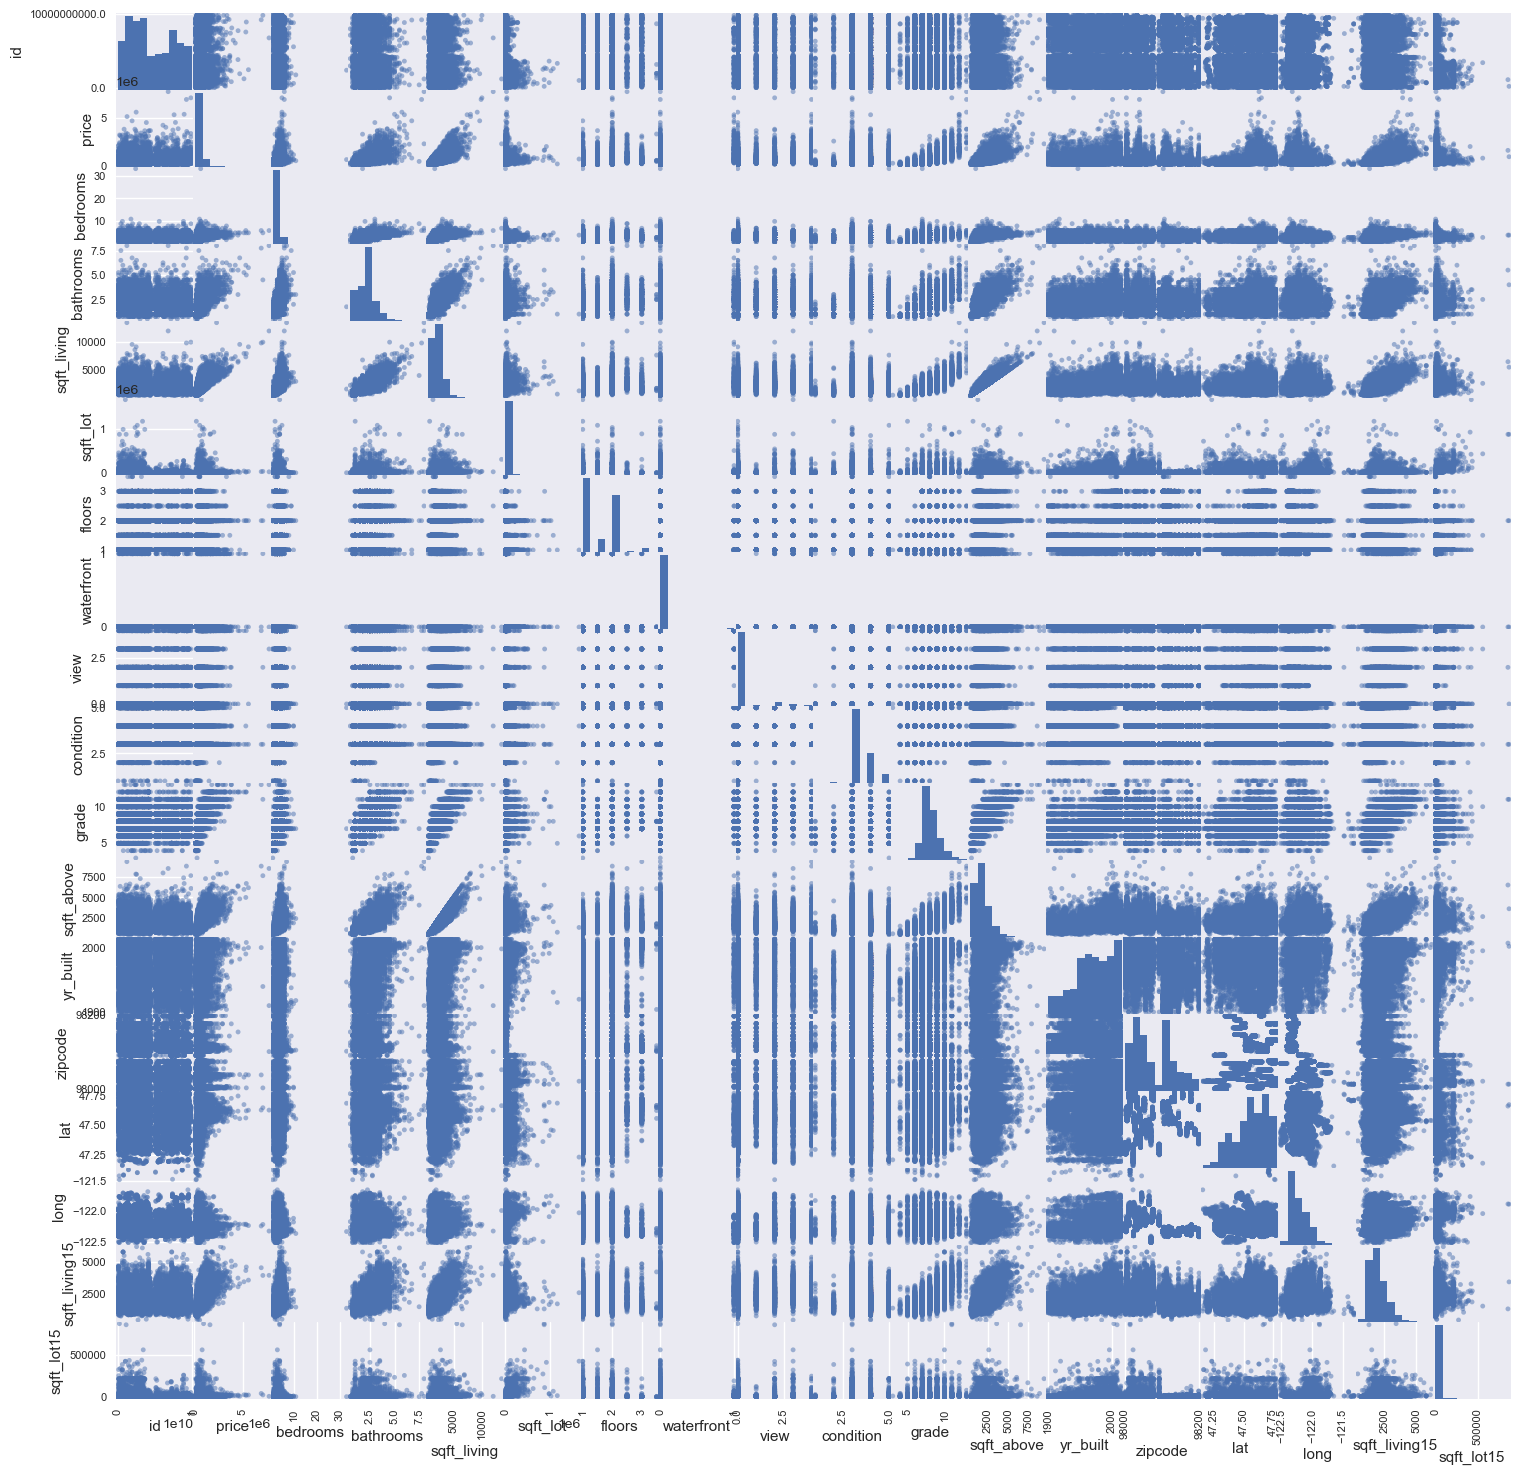

In [31]:
 pd.plotting.scatter_matrix(kc_house,figsize  = [18, 18]);
plt.show()

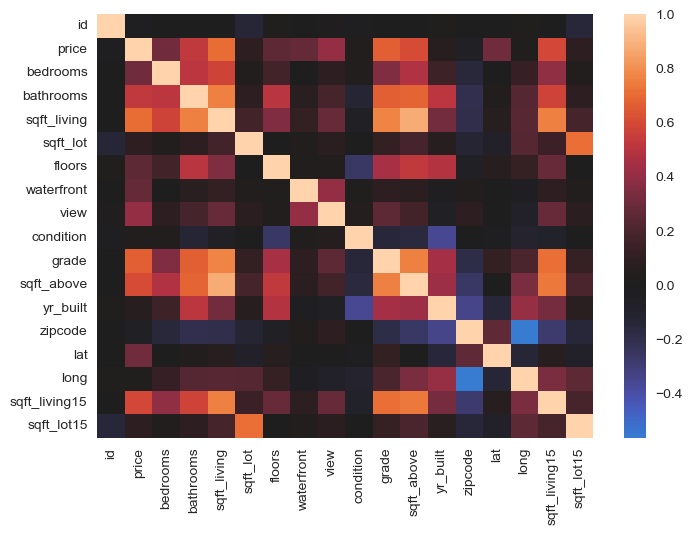

In [32]:
import seaborn as sns
sns.heatmap(kc_house.corr(), center=0);

In [33]:
from statsmodels.formula.api import ols

In [34]:
kc_house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,reno_year_no
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,-33554067.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,787.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,,98028,47.7379,-122.233,2720,8062,
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,,98136,47.5208,-122.393,1360,5000,
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,,98074,47.6168,-122.045,1800,7503,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,1530,0.0,2009,,98103,47.6993,-122.346,1530,1509,
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,2310,0.0,2014,,98146,47.5107,-122.362,1830,7200,
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,1020,0.0,2009,,98144,47.5944,-122.299,1020,2007,
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,1600,0.0,2004,,98027,47.5345,-122.069,1410,1287,


In [35]:
outcome = 'price'
x_cols = ['sqft_living', 'grade', 'sqft_living15','sqft_above','bathrooms']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula,data =kc_house).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     5161.
Date:                Wed, 07 Feb 2024   Prob (F-statistic):               0.00
Time:                        20:44:10   Log-Likelihood:            -2.9890e+05
No. Observations:               21597   AIC:                         5.978e+05
Df Residuals:                   21591   BIC:                         5.979e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -6.52e+05   1.36e+04    -48.079      0.000   -6.79e+05   -6.25e+05
sqft_living     245.5631      4.528     54.238      0.000     236.689     254.437
grade          1.119e+05   2470.776     45.293      0.000    1.07e+05    1.17e+05
sqft_living15    22.2598      4.032      5.520      0.000      14.356      30.164
sqft_above      -80.6961      4.458    -18.101      0.000     -89.434     -71.958
bathrooms     -3.567e+04   3440.363    -10.369      0.000   -4.24e+04   -2.89e+04
==============================================================================
Omnibus:                    17251.912   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1128620.760
Skew:                           3.361   Prob(JB):                         0.00
Kurtosis:                      37.771   Cond. No.                     2.96e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

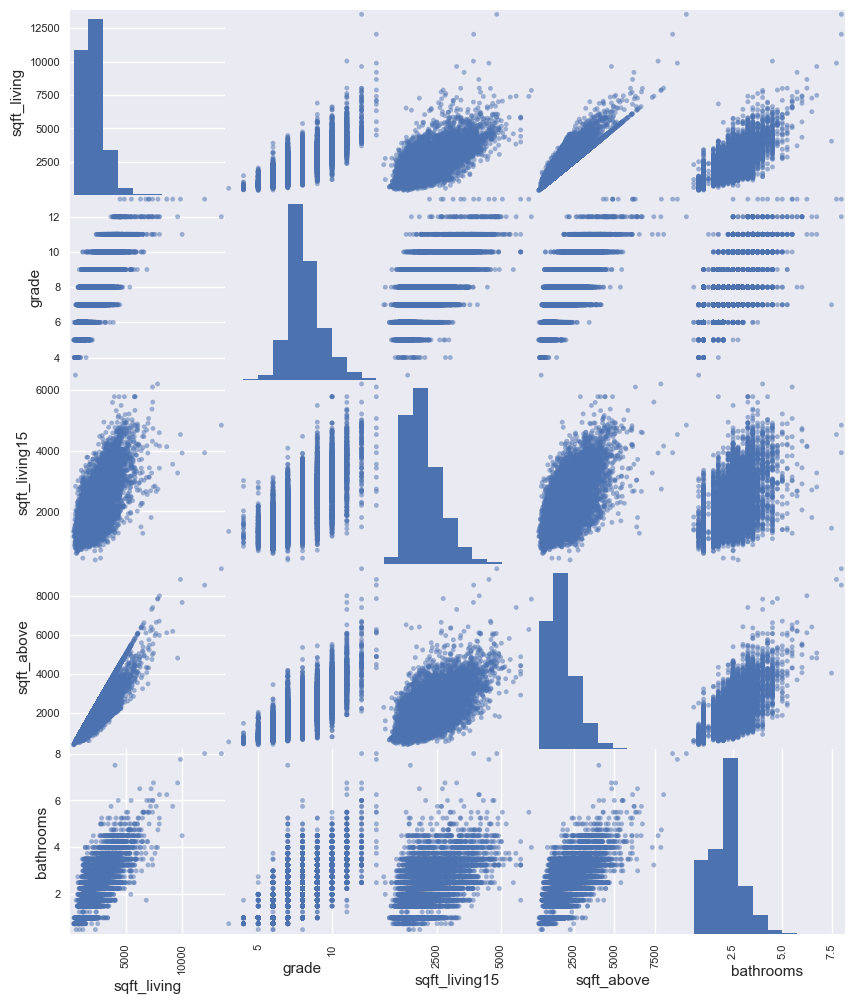

In [36]:
pd.plotting.scatter_matrix(kc_house[x_cols], figsize=(10,12));

In [37]:
kc_house = kc_house.drop(columns = ['date'])

In [38]:
kc_house.fillna(0)
kc_house

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,reno_year_no
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,-33554067.0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,787.0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,770,0.0,1933,,98028,47.7379,-122.233,2720,8062,
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1050,910.0,1965,,98136,47.5208,-122.393,1360,5000,
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1680,0.0,1987,,98074,47.6168,-122.045,1800,7503,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,...,1530,0.0,2009,,98103,47.6993,-122.346,1530,1509,
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,...,2310,0.0,2014,,98146,47.5107,-122.362,1830,7200,
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,...,1020,0.0,2009,,98144,47.5944,-122.299,1020,2007,
21595,291310100,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,...,1600,0.0,2004,,98027,47.5345,-122.069,1410,1287,


In [39]:
kc_house = kc_house.drop(columns = ['id', 'long', 'yr_renovated', 'zipcode', 'waterfront','view', 'reno_year_no', 'sqft_basement','condition','floors','yr_built','bathrooms'])
kc_house

,price,bedrooms,sqft_living,sqft_lot,grade,sqft_above,lat,sqft_living15,sqft_lot15
0,221900.0,3,1180,5650,7,1180,47.5112,1340,5650
1,538000.0,3,2570,7242,7,2170,47.7210,1690,7639
2,180000.0,2,770,10000,6,770,47.7379,2720,8062
3,604000.0,4,1960,5000,7,1050,47.5208,1360,5000
4,510000.0,3,1680,8080,8,1680,47.6168,1800,7503
...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,1530,1131,8,1530,47.6993,1530,1509
21593,400000.0,4,2310,5813,8,2310,47.5107,1830,7200
21594,402101.0,2,1020,1350,7,1020,47.5944,1020,2007
21595,400000.0,3,1600,2388,8,1600,47.5345,1410,1287


In [40]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(kc_house)

In [41]:
train

,price,bedrooms,sqft_living,sqft_lot,grade,sqft_above,lat,sqft_living15,sqft_lot15
16385,206000.0,3,1060,9600,6,1060,47.2878,1060,9604
17183,110000.0,3,1250,53143,6,1250,47.4235,1820,217800
11642,415885.0,3,1310,4163,7,1310,47.5301,1120,4166
937,253000.0,3,2020,6564,7,1310,47.3545,1710,5151
6647,168000.0,3,1200,7210,6,1200,47.3729,1200,7650
...,...,...,...,...,...,...,...,...,...
11194,600000.0,4,1700,7800,8,1700,47.6510,2430,8342
4150,631000.0,3,1670,1396,9,1250,47.6814,1610,5191
3871,387000.0,3,1810,10800,8,1210,47.5236,1800,10800
5458,352500.0,3,1170,8182,7,1170,47.7368,1610,8183


In [42]:
test

,price,bedrooms,sqft_living,sqft_lot,grade,sqft_above,lat,sqft_living15,sqft_lot15
2906,579950.0,3,1420,1217,8,1180,47.6827,1494,1264
10341,401000.0,3,1770,1977,8,1770,47.7186,1860,2210
6301,950000.0,3,3330,15093,9,3330,47.5395,4340,20031
7466,325000.0,3,1830,7585,8,1830,47.3893,2070,7585
13997,214950.0,3,1570,4875,7,1310,47.3621,1380,5200
...,...,...,...,...,...,...,...,...,...
11641,434000.0,3,1660,8301,7,1660,47.7647,1660,9489
10516,470000.0,4,2310,14023,9,2310,47.7351,2410,14007
4079,246700.0,3,1610,13309,7,1610,47.3398,1610,15725
1390,325000.0,2,1130,5070,7,1130,47.5141,860,6300


In [43]:
y = kc_house[['price']]
X = kc_house.drop(['price'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y)

In [44]:
X_train

,bedrooms,sqft_living,sqft_lot,grade,sqft_above,lat,sqft_living15,sqft_lot15
16634,3,1530,5000,7,1020,47.6806,1530,5000
12291,3,2680,8625,8,1590,47.5316,2620,14275
10978,4,2660,11200,8,2660,47.4722,2090,11120
9352,3,1410,1246,8,1410,47.6981,1410,1253
11455,4,2360,15860,9,2360,47.6307,2650,11798
...,...,...,...,...,...,...,...,...
11014,3,1480,800,8,1000,47.5493,1480,1143
19164,4,1970,7532,8,1390,47.7219,1970,8248
6393,2,750,7000,6,750,47.5655,1100,8777
17206,3,1160,7491,6,1160,47.7024,1800,2267


In [45]:
y_train

,price
16634,635000.0
12291,575000.0
10978,425000.0
9352,429000.0
11455,615000.0
...,...
11014,469000.0
19164,475000.0
6393,258000.0
17206,417500.0


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [47]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

16197 5400 16197 5400


In [48]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

log_transformer = FunctionTransformer(np.log, validate=True)

log_columns = ['sqft_living', 'sqft_above']


new_log_columns = ['log_sqft_living', 'log_sqft_above']




In [49]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

16197 5400 16197 5400


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [51]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

16197 5400 16197 5400


In [52]:
X_test_log = pd.DataFrame(log_transformer.transform(X_test[log_columns]), 
                          columns=new_log_columns, index=X_test.index)

X_test = pd.concat([X_test.drop(log_columns, axis=1), X_test_log], axis=1)
X_test

,bedrooms,sqft_lot,grade,lat,sqft_living15,sqft_lot15,log_sqft_living,log_sqft_above
3686,3,8573,6,47.5030,850,8382,6.745236,6.396930
10247,3,6083,6,47.6966,1510,5712,7.319865,6.756932
4037,4,42000,7,47.4819,2060,50094,7.489971,7.064759
3437,2,2500,7,47.5707,1500,5000,7.038784,6.445720
19291,3,3920,7,47.6718,1640,4017,7.313220,6.907755
...,...,...,...,...,...,...,...,...
18276,5,6757,6,47.7332,1590,6794,7.064759,6.684612
15003,3,5100,7,47.5898,2140,4452,7.420579,6.897705
13478,4,4640,9,47.6272,3240,5800,8.089482,7.766417
18399,4,13906,11,47.3814,2980,13000,8.669056,8.229511


In [53]:
X_train_log = pd.DataFrame(log_transformer.fit_transform(X_train[log_columns]), 
                           columns=new_log_columns, index=X_train.index)
X_train = pd.concat([X_train.drop(log_columns, axis=1), X_train_log], axis=1)
X_train

,bedrooms,sqft_lot,grade,lat,sqft_living15,sqft_lot15,log_sqft_living,log_sqft_above
6405,3,4499,8,47.5664,2130,5114,7.539027,7.539027
937,3,6564,7,47.3545,1710,5151,7.610853,7.177782
19076,5,493534,9,47.4536,2160,219542,8.459564,8.283999
15201,2,3880,7,47.6844,1430,3880,7.265430,7.265430
13083,3,32112,8,47.3451,2310,41606,7.727535,7.461640
...,...,...,...,...,...,...,...,...
11964,3,5800,7,47.5308,2230,6088,7.709757,7.709757
21575,4,3852,8,47.5001,1810,5641,7.926603,7.926603
5390,4,9000,6,47.6492,1520,8500,7.333023,7.333023
860,1,15000,5,47.4810,1170,15000,5.940171,5.940171


In [54]:
X_train

,bedrooms,sqft_lot,grade,lat,sqft_living15,sqft_lot15,log_sqft_living,log_sqft_above
6405,3,4499,8,47.5664,2130,5114,7.539027,7.539027
937,3,6564,7,47.3545,1710,5151,7.610853,7.177782
19076,5,493534,9,47.4536,2160,219542,8.459564,8.283999
15201,2,3880,7,47.6844,1430,3880,7.265430,7.265430
13083,3,32112,8,47.3451,2310,41606,7.727535,7.461640
...,...,...,...,...,...,...,...,...
11964,3,5800,7,47.5308,2230,6088,7.709757,7.709757
21575,4,3852,8,47.5001,1810,5641,7.926603,7.926603
5390,4,9000,6,47.6492,1520,8500,7.333023,7.333023
860,1,15000,5,47.4810,1170,15000,5.940171,5.940171


In [55]:
y_test.astype(str).astype(float)

,price
3686,132500.0
10247,415000.0
4037,494000.0
3437,355000.0
19291,606000.0
...,...
18276,397000.0
15003,615000.0
13478,1330000.0
18399,784500.0


In [56]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [57]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [58]:
mse_train = np.sum((y_train - y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test - y_hat_test)**2)/len(y_test)
print('Train Mean Squared Error:', mse_train)
print('Test Mean Squared Error:', mse_test)

Train Mean Squared Error: price    6.004364e+10
dtype: float64
Test Mean Squared Error: price    6.420967e+10
dtype: float64


In [59]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 60043636776.84724
Test Mean Squared Error: 64209674752.49263


In [60]:
from sklearn.tree import DecisionTreeRegressor

other_model = DecisionTreeRegressor(random_state=42)
other_model.fit(X_train, y_train)

other_train_mse = mean_squared_error(y_train, other_model.predict(X_train))
other_test_mse = mean_squared_error(y_test, other_model.predict(X_test))
print('Train Mean Squared Error:', other_train_mse)
print('Test Mean Squared Error:', other_test_mse)

Train Mean Squared Error: 74306052.68157683
Test Mean Squared Error: 54583962877.5432


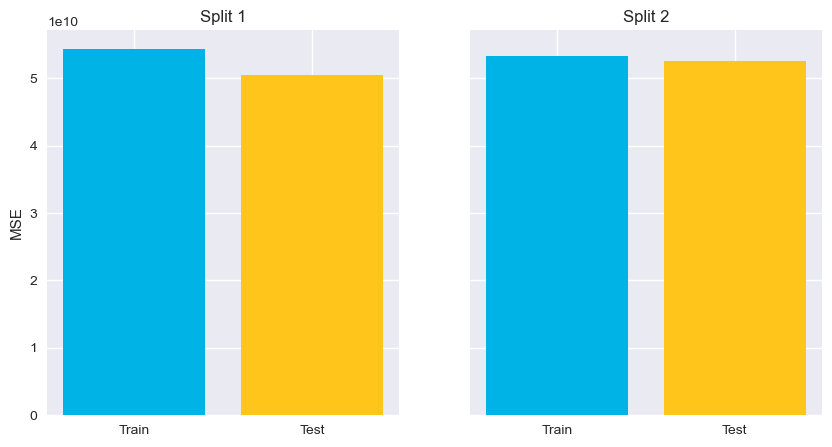

In [62]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


y = kc_house[['price']]
X = kc_house.drop(['price'], axis=1)

linreg = LinearRegression()

# Split using random_state 87
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, random_state=87, test_size=0.33)
linreg.fit(X_train_1, y_train_1)
train_mse_1 = mean_squared_error(y_train_1, linreg.predict(X_train_1))
test_mse_1 = mean_squared_error(y_test_1, linreg.predict(X_test_1))

# Split using random_state 41
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, random_state=41, test_size=0.33)
linreg.fit(X_train_2, y_train_2)
train_mse_2 = mean_squared_error(y_train_2, linreg.predict(X_train_2))
test_mse_2 = mean_squared_error(y_test_2, linreg.predict(X_test_2))

# Plot metrics
fig, (left, right) = plt.subplots(ncols=2, figsize=(10,5), sharey=True)
labels = ["Train", "Test"]
colors = ["#00B3E6", "#FFC51B"]
left.bar(labels, [train_mse_1, test_mse_1], color=colors)
left.set_title("Split 1")
left.set_ylabel("MSE")
right.bar(labels, [train_mse_2, test_mse_2], color=colors)
right.set_title("Split 2");

In [66]:
 from sklearn.model_selection import cross_val_score

cross_val_score(linreg, X, y)

array([0.5878174 , 0.59708507, 0.60090295, 0.61261889, 0.62419976])

In [68]:
from sklearn.model_selection import cross_validate

cross_validate(linreg, X, y)["test_score"]

array([0.5878174 , 0.59708507, 0.60090295, 0.61261889, 0.62419976])

In [69]:
cross_validate(linreg, X, y)

{'fit_time': array([0.00658154, 0.00736332, 0.00658965, 0.0085268 , 0.00400615]),
 'score_time': array([0.00200605, 0.00301647, 0.00294161, 0.00099921, 0.0025537 ]),
 'test_score': array([0.5878174 , 0.59708507, 0.60090295, 0.61261889, 0.62419976])}

In [70]:
cross_validate(linreg, X, y, scoring=["r2", "neg_mean_squared_error"])

{'fit_time': array([0.00751281, 0.00551677, 0.00796103, 0.00853491, 0.00597525]),
 'score_time': array([0.00400043, 0.00557327, 0.00250483, 0.00303292, 0.00451922]),
 'test_r2': array([0.5878174 , 0.59708507, 0.60090295, 0.61261889, 0.62419976]),
 'test_neg_mean_squared_error': array([-6.24855090e+10, -5.65689442e+10, -4.66998648e+10, -4.92450079e+10,
        -5.16947880e+10])}

In [71]:
cross_validate(linreg, X, y, return_train_score=True)

{'fit_time': array([0.00500393, 0.00399947, 0.00953674, 0.00629973, 0.00400043]),
 'score_time': array([0.00352001, 0.00325584, 0.00199246, 0.00254774, 0.00151014]),
 'test_score': array([0.5878174 , 0.59708507, 0.60090295, 0.61261889, 0.62419976]),
 'train_score': array([0.61223809, 0.60937258, 0.60786401, 0.60526653, 0.60119298])}

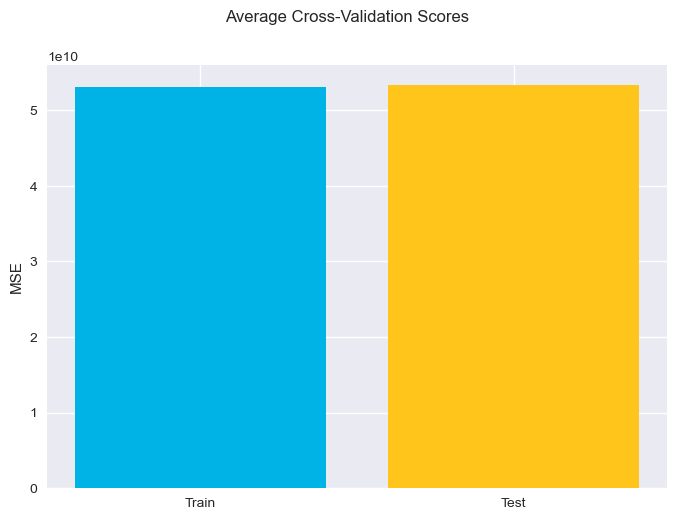

In [73]:
cross_val_results = cross_validate(linreg, X, y, scoring="neg_mean_squared_error", return_train_score=True)
# Negative signs in front to convert back to MSE from -MSE
train_avg = -cross_val_results["train_score"].mean()
test_avg = -cross_val_results["test_score"].mean()

fig, ax = plt.subplots()
ax.bar(labels, [train_avg, test_avg], color=colors)
ax.set_ylabel("MSE")
fig.suptitle("Average Cross-Validation Scores");

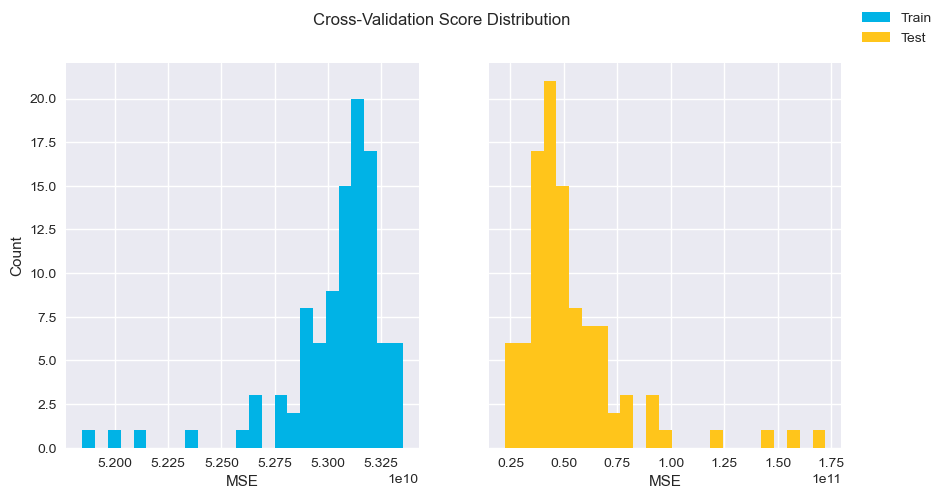

In [74]:

cross_val_results = cross_validate(linreg, X, y, cv=100, scoring="neg_mean_squared_error", return_train_score=True)
train_scores = -cross_val_results["train_score"]
test_scores = -cross_val_results["test_score"]

fig, (left, right) = plt.subplots(ncols=2, figsize=(10,5), sharey=True)
bins=25
left.hist(train_scores, label=labels[0], bins=bins, color=colors[0])
left.set_ylabel("Count")
left.set_xlabel("MSE")
right.hist(test_scores, label=labels[1], bins=bins, color=colors[1])
right.set_xlabel("MSE")
fig.suptitle("Cross-Validation Score Distribution")
fig.legend();

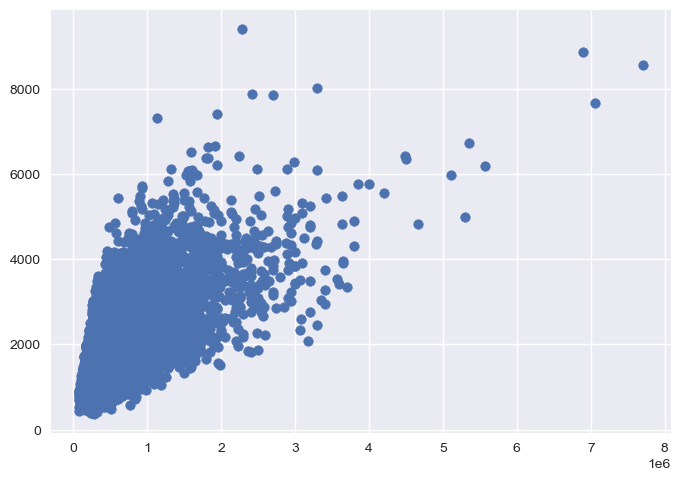

In [75]:
plt.scatter(kc_house.price, kc_house.sqft_above)
plt.show()